In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Preparation

In [2]:
columns = pd.read_csv("data/iris names.txt", names=['names'])
columns

,names
0,sepal length in cm
1,sepal width in cm
2,petal length in cm
3,petal width in cm
4,class


In [35]:
data = pd.read_csv("data/iris2.data", sep="\t", header=None, names=columns['names'])
data.head(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [4]:
class_1 = data[data['class'] == 1]
class_2 = data[data['class'] == 2]
class_3 = data[data['class'] == 3]

# 2. Functions

In [5]:
def stats(*args):
    c = 0
    d = []
    title = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
    rows, cols = [2 for x in range(2)]
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10, 2.5))
    for arg in args:
        data = {
            "Min": [arg[0], arg[1], arg[2]],
            "Mean": [arg[3], arg[4], arg[5]],
            "Max": [arg[6], arg[7], arg[8]]
        }
        d.append(data)
    for i in range(rows):
        for j in range(cols):
            df = pd.DataFrame(data=d[c])
            df.index = ['Class 1', 'Class 2', 'Class 3']
            ax[i,j].table(cellText = df.values, rowLabels = df.index,
                          colLabels = df.columns, cellLoc = 'center')
            ax[i,j].set_title(title[c], pad=-60, y=1.000001)
            ax[i,j].axis('off')
            c += 1

In [6]:
def draw_plots(df_1, df_2, df_3, rows, cols):
    # df_1 - dataframe of class 1
    # df_2 - dataframe of class 2
    # df_3 - dataframe of class 3
    # rows - row count of a plot group
    # cols - column count of a plot group
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,10))
    columns = df_1.columns.to_list()
    c = 0
    for i in range(rows):
        for j in range(cols):
            ax[i,j].scatter(x=df_1[columns[c]].index, y=df_1[columns[c]], facecolors='none', edgecolors='red')
            ax[i,j].scatter(x=df_2[columns[c]].index, y=df_2[columns[c]], facecolors='none', edgecolors='green')
            ax[i,j].scatter(x=df_3[columns[c]].index, y=df_3[columns[c]], facecolors='none', edgecolors='blue')
            ax[i,j].grid(which='Major', axis='both')
            ax[i,j].set(title=f"{' '.join(columns[c].split()[:2]).title()}",
                        xlabel="Samples",
                        axisbelow=True)
            ax[i,j].set(ylabel="Length, cm") if j/2 == 0 else ax[i,j].set(ylabel="Width, cm")
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"], title="Class distribution")
            c += 1
    fig.savefig("images/parameter_distribution.png")

In [7]:
def membership(p1, p2, p3, p4, p5, r1, r2, r3, r4, r5, rows, cols):
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,15))
    title = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Output', 'Output']
    c = 0
    for i in range(rows):
        for j in range(cols):
            if c == 0:
                arg = p1
                x = r1
            elif c == 1:
                arg = p2
                x = r2
            elif c == 2:
                arg = p3
                x = r3
            elif c == 3:
                arg = p4
                x = r4
            elif c == 4:
                arg = p5
                x = r5
            trimf1 = fuzz.trimf(x, [arg[0], arg[3], arg[6]])
            trimf2 = fuzz.trimf(x, [arg[1], arg[4], arg[7]])
            trimf3 = fuzz.trimf(x, [arg[2], arg[5], arg[8]])
            ax[i,j].plot(x, trimf1)
            ax[i,j].plot(x, trimf2)
            ax[i,j].plot(x, trimf3)
            ax[i,j].grid(which='Major', axis='both')
            ax[i,j].set_title(title[c])
            ax[i,j].set(ylabel="Membership gradient")
            ax[i,j].set(xlabel="Length, cm") if j/2 == 0 else ax[i,j].set(xlabel="Width, cm")
            if c >= 4: ax[i,j].set(xlabel="Class")
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"], title="Class membership")
            c += 1

# 3. Parameters

In [8]:
sepal_length_interval_1 = [class_1['sepal length in cm'].min(), class_1['sepal length in cm'].max()]
sepal_width_interval_1 = [class_1['sepal width in cm'].min(), class_1['sepal width in cm'].max()]
petal_length_interval_1 = [class_1['petal length in cm'].min(), class_1['petal length in cm'].max()]
petal_width_interval_1 = [class_1['petal width in cm'].min(), class_1['petal width in cm'].max()]
sepal_length_interval_2 = [class_2['sepal length in cm'].min(), class_2['sepal length in cm'].max()]
sepal_width_interval_2 = [class_2['sepal width in cm'].min(), class_2['sepal width in cm'].max()]
petal_length_interval_2 = [class_2['petal length in cm'].min(), class_2['petal length in cm'].max()]
petal_width_interval_2 = [class_2['petal width in cm'].min(), class_2['petal width in cm'].max()]
sepal_length_interval_3 = [class_3['sepal length in cm'].min(), class_3['sepal length in cm'].max()]
sepal_width_interval_3 = [class_3['sepal width in cm'].min(), class_3['sepal width in cm'].max()]
petal_length_interval_3 = [class_3['petal length in cm'].min(), class_3['petal length in cm'].max()]
petal_width_interval_3 = [class_3['petal width in cm'].min(), class_3['petal width in cm'].max()]

In [9]:
sepal_length_mean_1 = class_1['sepal length in cm'].mean()
sepal_width_mean_1 = class_1['sepal width in cm'].mean()
petal_length_mean_1 = class_1['petal length in cm'].mean()
petal_width_mean_1 = class_1['petal width in cm'].mean()
sepal_length_mean_2 = class_2['sepal length in cm'].mean()
sepal_width_mean_2 = class_2['sepal width in cm'].mean()
petal_length_mean_2 = class_2['petal length in cm'].mean()
petal_width_mean_2 = class_2['petal width in cm'].mean()
sepal_length_mean_3 = class_3['sepal length in cm'].mean()
sepal_width_mean_3 = class_3['sepal width in cm'].mean()
petal_length_mean_3 = class_3['petal length in cm'].mean()
petal_width_mean_3 = class_3['petal width in cm'].mean()

In [10]:
p1 = [sepal_length_interval_1[0], sepal_length_interval_2[0], sepal_length_interval_3[0],
      sepal_length_mean_1, sepal_length_mean_2, sepal_length_mean_3,
      sepal_length_interval_1[1], sepal_length_interval_2[1], sepal_length_interval_3[1]]
p2 = [sepal_width_interval_1[0], sepal_width_interval_2[0], sepal_width_interval_3[0],
      sepal_width_mean_1, sepal_width_mean_2, sepal_width_mean_3,
      sepal_width_interval_1[1], sepal_width_interval_2[1], sepal_width_interval_3[1]]
p3 = [petal_length_interval_1[0], petal_length_interval_2[0], petal_length_interval_3[0],
      petal_length_mean_1, petal_length_mean_2, petal_length_mean_3,
      petal_length_interval_1[1], petal_length_interval_2[1], petal_length_interval_3[1]]
p4 = [petal_width_interval_1[0], petal_width_interval_2[0], petal_width_interval_3[0],
      petal_width_mean_1, petal_width_mean_2, petal_width_mean_3,
      petal_width_interval_1[1], petal_width_interval_2[1], petal_width_interval_3[1]]
p5 = [0, 1, 2,
      0.5, 1.5, 2.5,
      1, 2, 3]

In [41]:
r1 = np.arange(4, 8, 0.01)
r2 = np.arange(2, 4.5, 0.01)
r3 = np.arange(1, 7, 0.01)
r4 = np.arange(0, 2.5, 0.01)
r5 = np.arange(0, 3, 0.01)

# 4. Plots

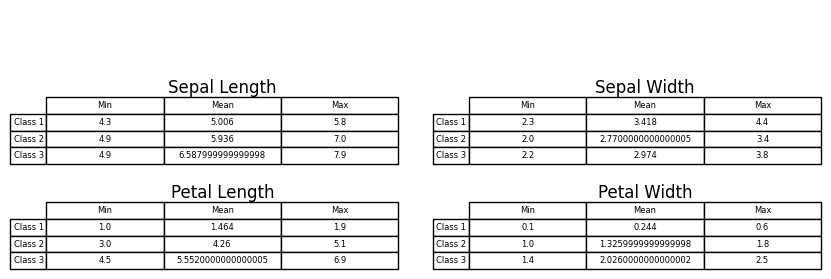

In [37]:
stats(p1, p2, p3, p4)

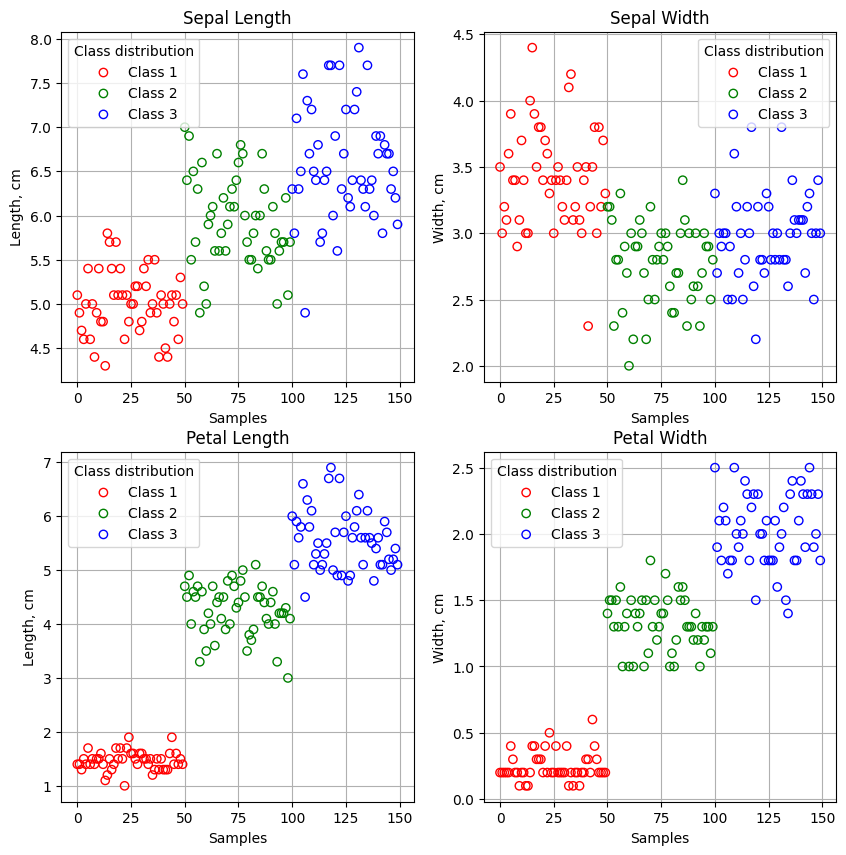

In [38]:
draw_plots(class_1, class_2, class_3, 2, 2)

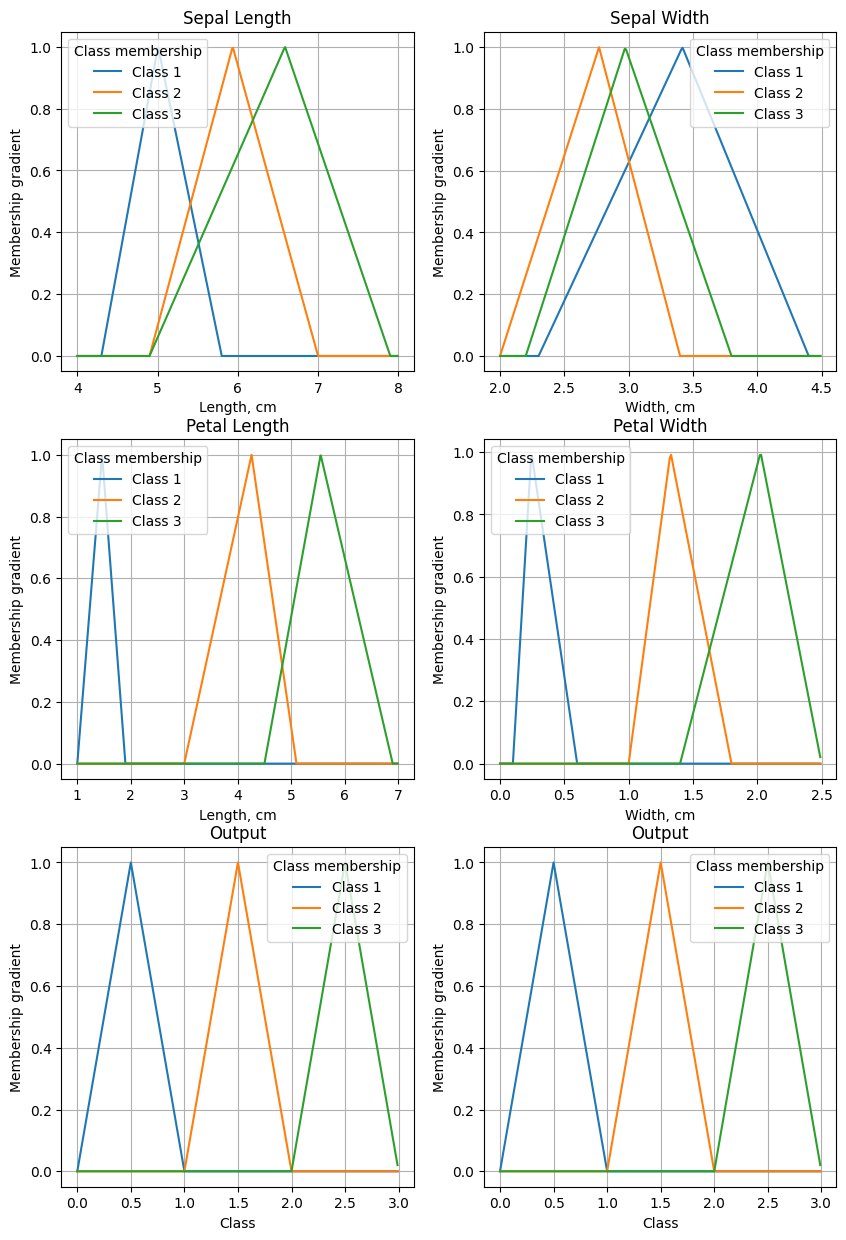

In [42]:
membership(p1, p2, p3, p4, p5, r1, r2, r3, r4, r5, 3, 2)

In [43]:
# Membership functions for sepal length
p1_mf1 = fuzz.trimf(r1, [p1[0], p1[3], p1[6]]) # Class 1
p1_mf2 = fuzz.trimf(r1, [p1[1], p1[4], p1[7]]) # Class 2
p1_mf3 = fuzz.trimf(r1, [p1[2], p1[5], p1[8]]) # Class 3
# Membership functions for sepal width
p2_mf1 = fuzz.trimf(r2, [p2[0], p2[3], p2[6]]) # Class 1
p2_mf2 = fuzz.trimf(r2, [p2[1], p2[4], p2[7]]) # Class 2
p2_mf3 = fuzz.trimf(r2, [p2[2], p2[5], p2[8]]) # Class 3
# Membership functions for petal length
p3_mf1 = fuzz.trimf(r3, [p3[0], p3[3], p3[6]]) # Class 1
p3_mf2 = fuzz.trimf(r3, [p3[1], p3[4], p3[7]]) # Class 2
p3_mf3 = fuzz.trimf(r3, [p3[2], p3[5], p3[8]]) # Class 3
# Membership functions for petal width
p4_mf1 = fuzz.trimf(r4, [p4[0], p4[3], p4[6]]) # Class 1
p4_mf2 = fuzz.trimf(r4, [p4[1], p4[4], p4[7]]) # Class 2
p4_mf3 = fuzz.trimf(r4, [p4[2], p4[5], p4[8]]) # Class 3
# Output
p5_mf1 = fuzz.trimf(r5, [p5[0], p5[3], p5[6]]) # Class 1
p5_mf2 = fuzz.trimf(r5, [p5[1], p5[4], p5[7]]) # Class 2
p5_mf3 = fuzz.trimf(r5, [p5[2], p5[5], p5[8]]) # Class 3

In [51]:
sepal_length = [fuzz.interp_membership(r1, p1_mf1, data['sepal length in cm'][0]),
                fuzz.interp_membership(r1, p1_mf2, data['sepal length in cm'][0]),
                fuzz.interp_membership(r1, p1_mf3, data['sepal length in cm'][0])]
sepal_width = [fuzz.interp_membership(r2, p2_mf1, data['sepal width in cm'][0]),
               fuzz.interp_membership(r2, p2_mf2, data['sepal width in cm'][0]),
               fuzz.interp_membership(r2, p2_mf3, data['sepal width in cm'][0])]
petal_length = [fuzz.interp_membership(r3, p3_mf1, data['petal length in cm'][0]),
                fuzz.interp_membership(r3, p3_mf2, data['petal length in cm'][0]),
                fuzz.interp_membership(r3, p3_mf3, data['petal length in cm'][0])]
petal_width = [fuzz.interp_membership(r4, p4_mf1, data['petal width in cm'][0]),
               fuzz.interp_membership(r4, p4_mf2, data['petal width in cm'][0]),
               fuzz.interp_membership(r4, p4_mf3, data['petal width in cm'][0])]
print(f"Sepal length: {sepal_length}\nSepal width: {sepal_width}\nPetal length: {petal_length}\nPetal width: {petal_width}")

Sepal length: [0.8816120906801014, 0.19305019305019244, 0.1184834123222746]
Sepal width: [0.9164969450101835, 0.0, 0.3631961259079903]
Petal length: [0.8620689655172412, 0.0, 0.0]
Petal width: [0.6944444444444445, 0.0, 0.0]
